# Practical 17

# Demonstrate the comparison between Gini Index and entropy using Iris data set.

In [1]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.datasets import load_iris  # load_iris returns two things 1. data 2. target

In [2]:
# Importing the data set from Sklearn
import sklearn.datasets as data
iris_data = load_iris()
dataset = pd.DataFrame(iris_data.data)
print("Features Name : ", iris_data.feature_names)
print("Target Name : ", iris_data.target_names)
print("Dataset Length : ", len(dataset))
print("Dataset Shape : ", dataset.shape)
dataset.head()

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Name :  ['setosa' 'versicolor' 'virginica']
Dataset Length :  150
Dataset Shape :  (150, 4)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
print(dataset)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [5]:
x = dataset.values [:, 0:4]  # Seperating dependent and independent variables.
y = iris_data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)  # Splitting testing and training data set.

In [6]:
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [7]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)  # Applying decision to classifier using entropy.
clf_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [8]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 1, max_depth = 5)    # Applying decision to classifier using gini
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [9]:
y_pred2 = clf_entropy.predict(x_test)  
print("Predicted Values : ")
print(y_pred2)

Predicted Values : 
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [10]:
y_pred1 = clf_gini.predict(x_test)
print("Predicted Values : ")
print(y_pred1)

Predicted Values : 
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [11]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred2))  # Creating confusion matrix and finding accuracy and report of Entropy
print("Accuracy: \n", accuracy_score(y_test, y_pred2)*100)
print("Report: \n", classification_report(y_test, y_pred2))

Confusion Matrix: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Accuracy: 
 95.55555555555556
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [12]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred1))  # Creating confusion matrix and finding accuracy and report of Gini
print("Accuracy: \n", accuracy_score(y_test, y_pred1)*100)
print("Report: \n", classification_report(y_test, y_pred1))

Confusion Matrix: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Accuracy: 
 95.55555555555556
Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [13]:
xrandom = [[6.4, 1.8, 6.6, 2.1]]
y_pred = clf_entropy.predict(xrandom)
print(y_pred)

[2]


In [14]:
xrandom = [[6.4, 1.8, 6.6, 2.1]]
y_pred = clf_gini.predict(xrandom)
print(y_pred)

[2]


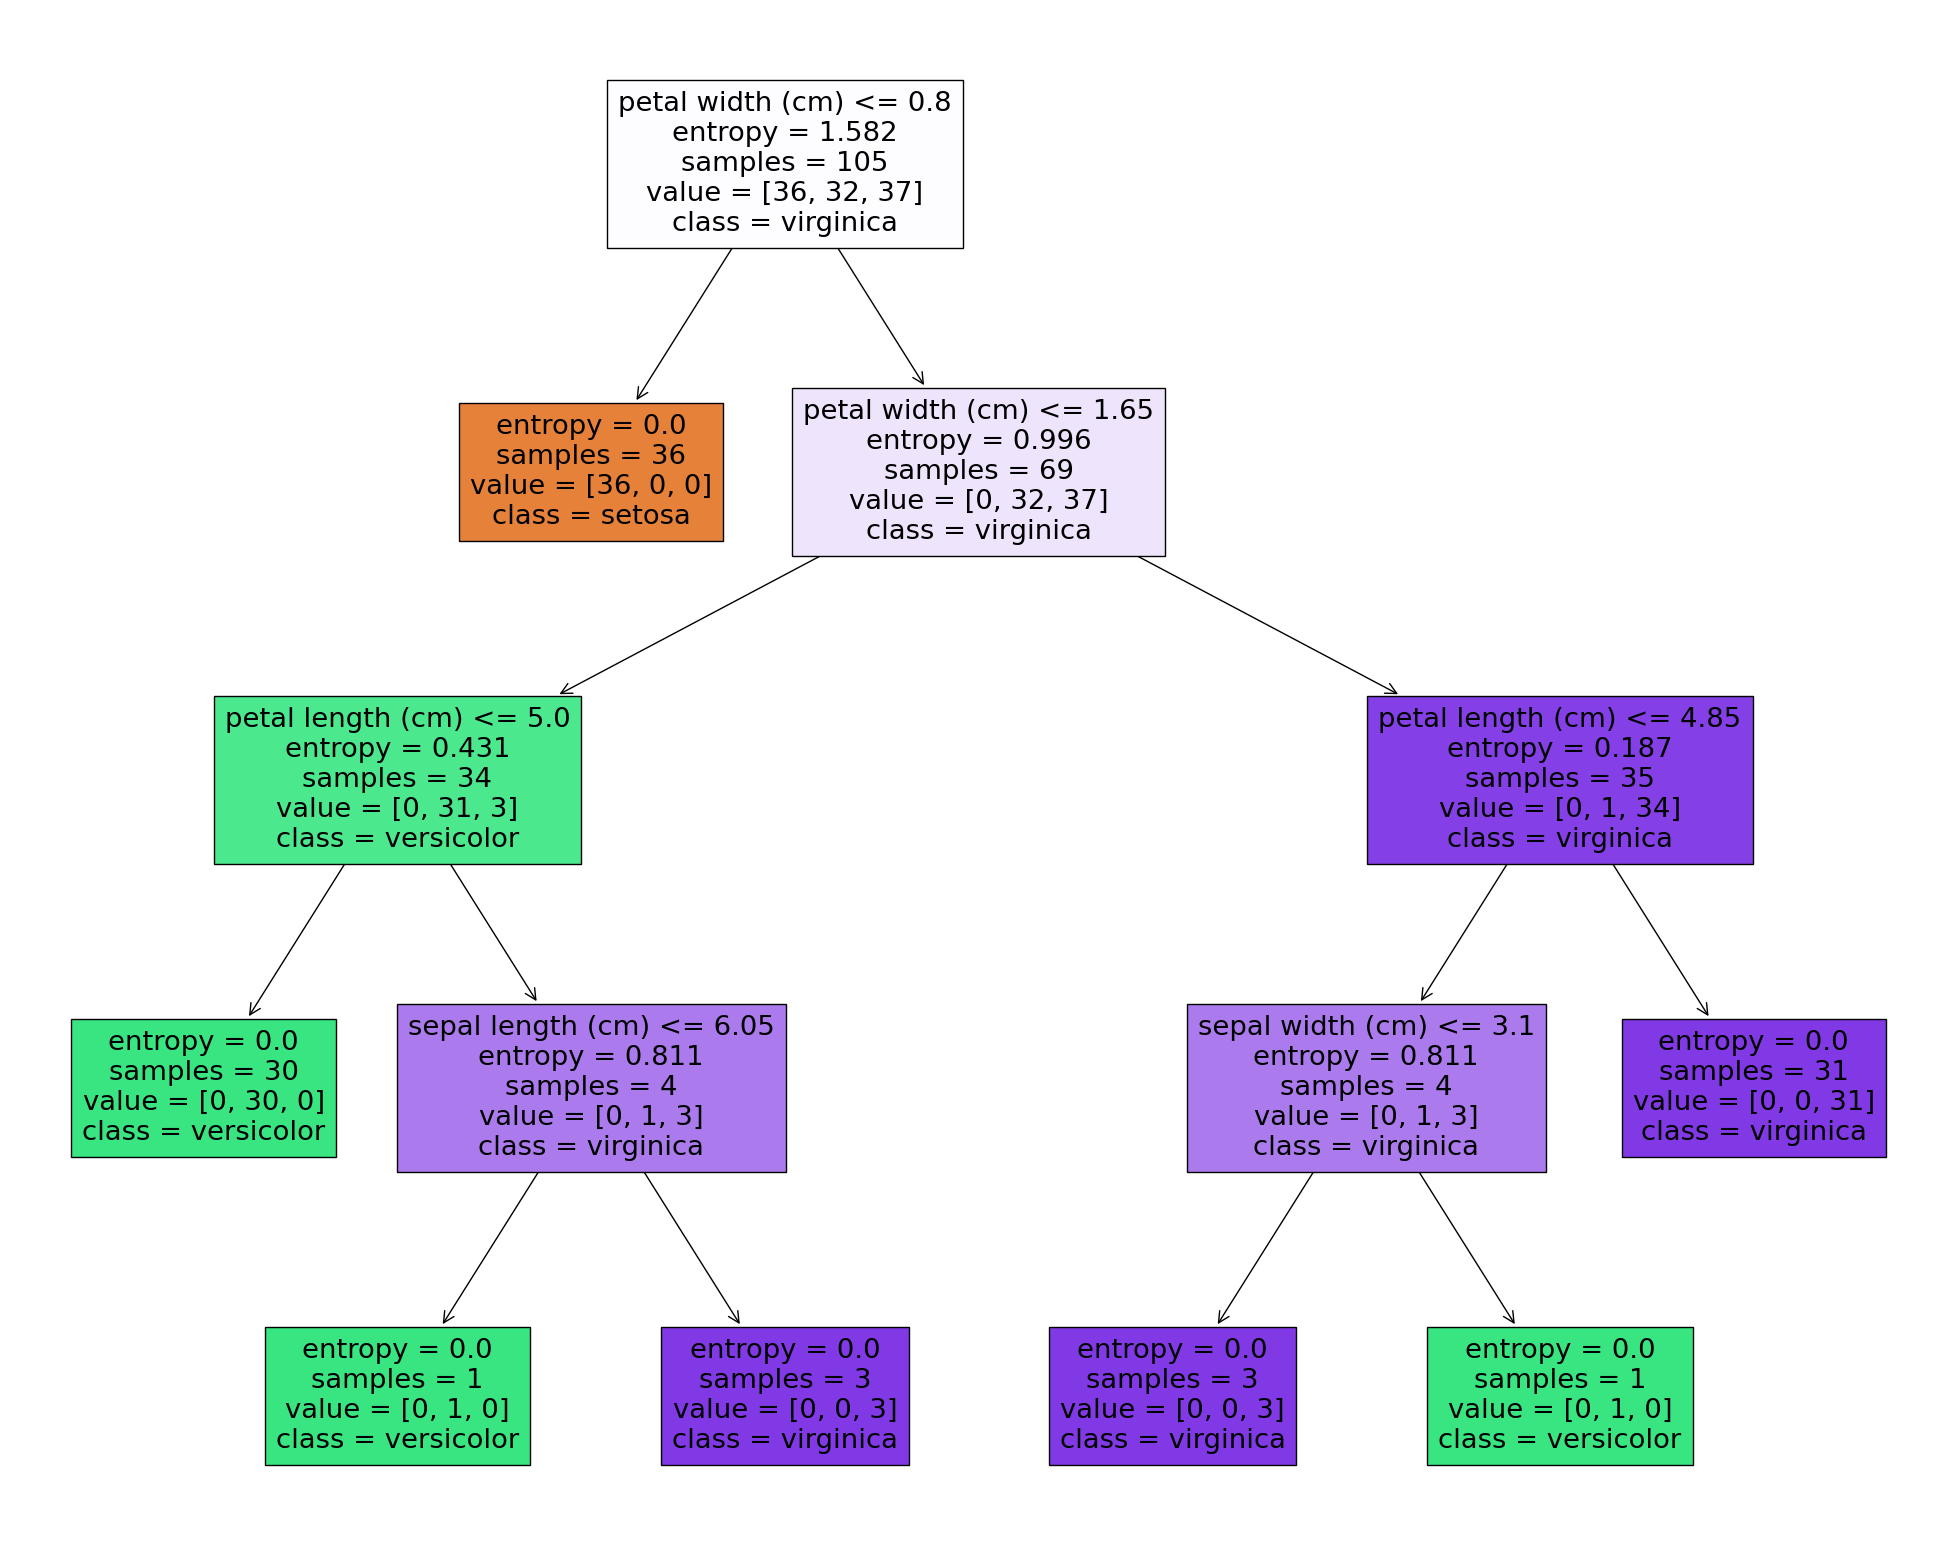

In [15]:
fig = plt.figure(figsize = (25,20))  # Creating decision tree on entropy.
a = tree.plot_tree(clf_entropy, feature_names = iris_data.feature_names, class_names = iris_data.target_names, filled = True)

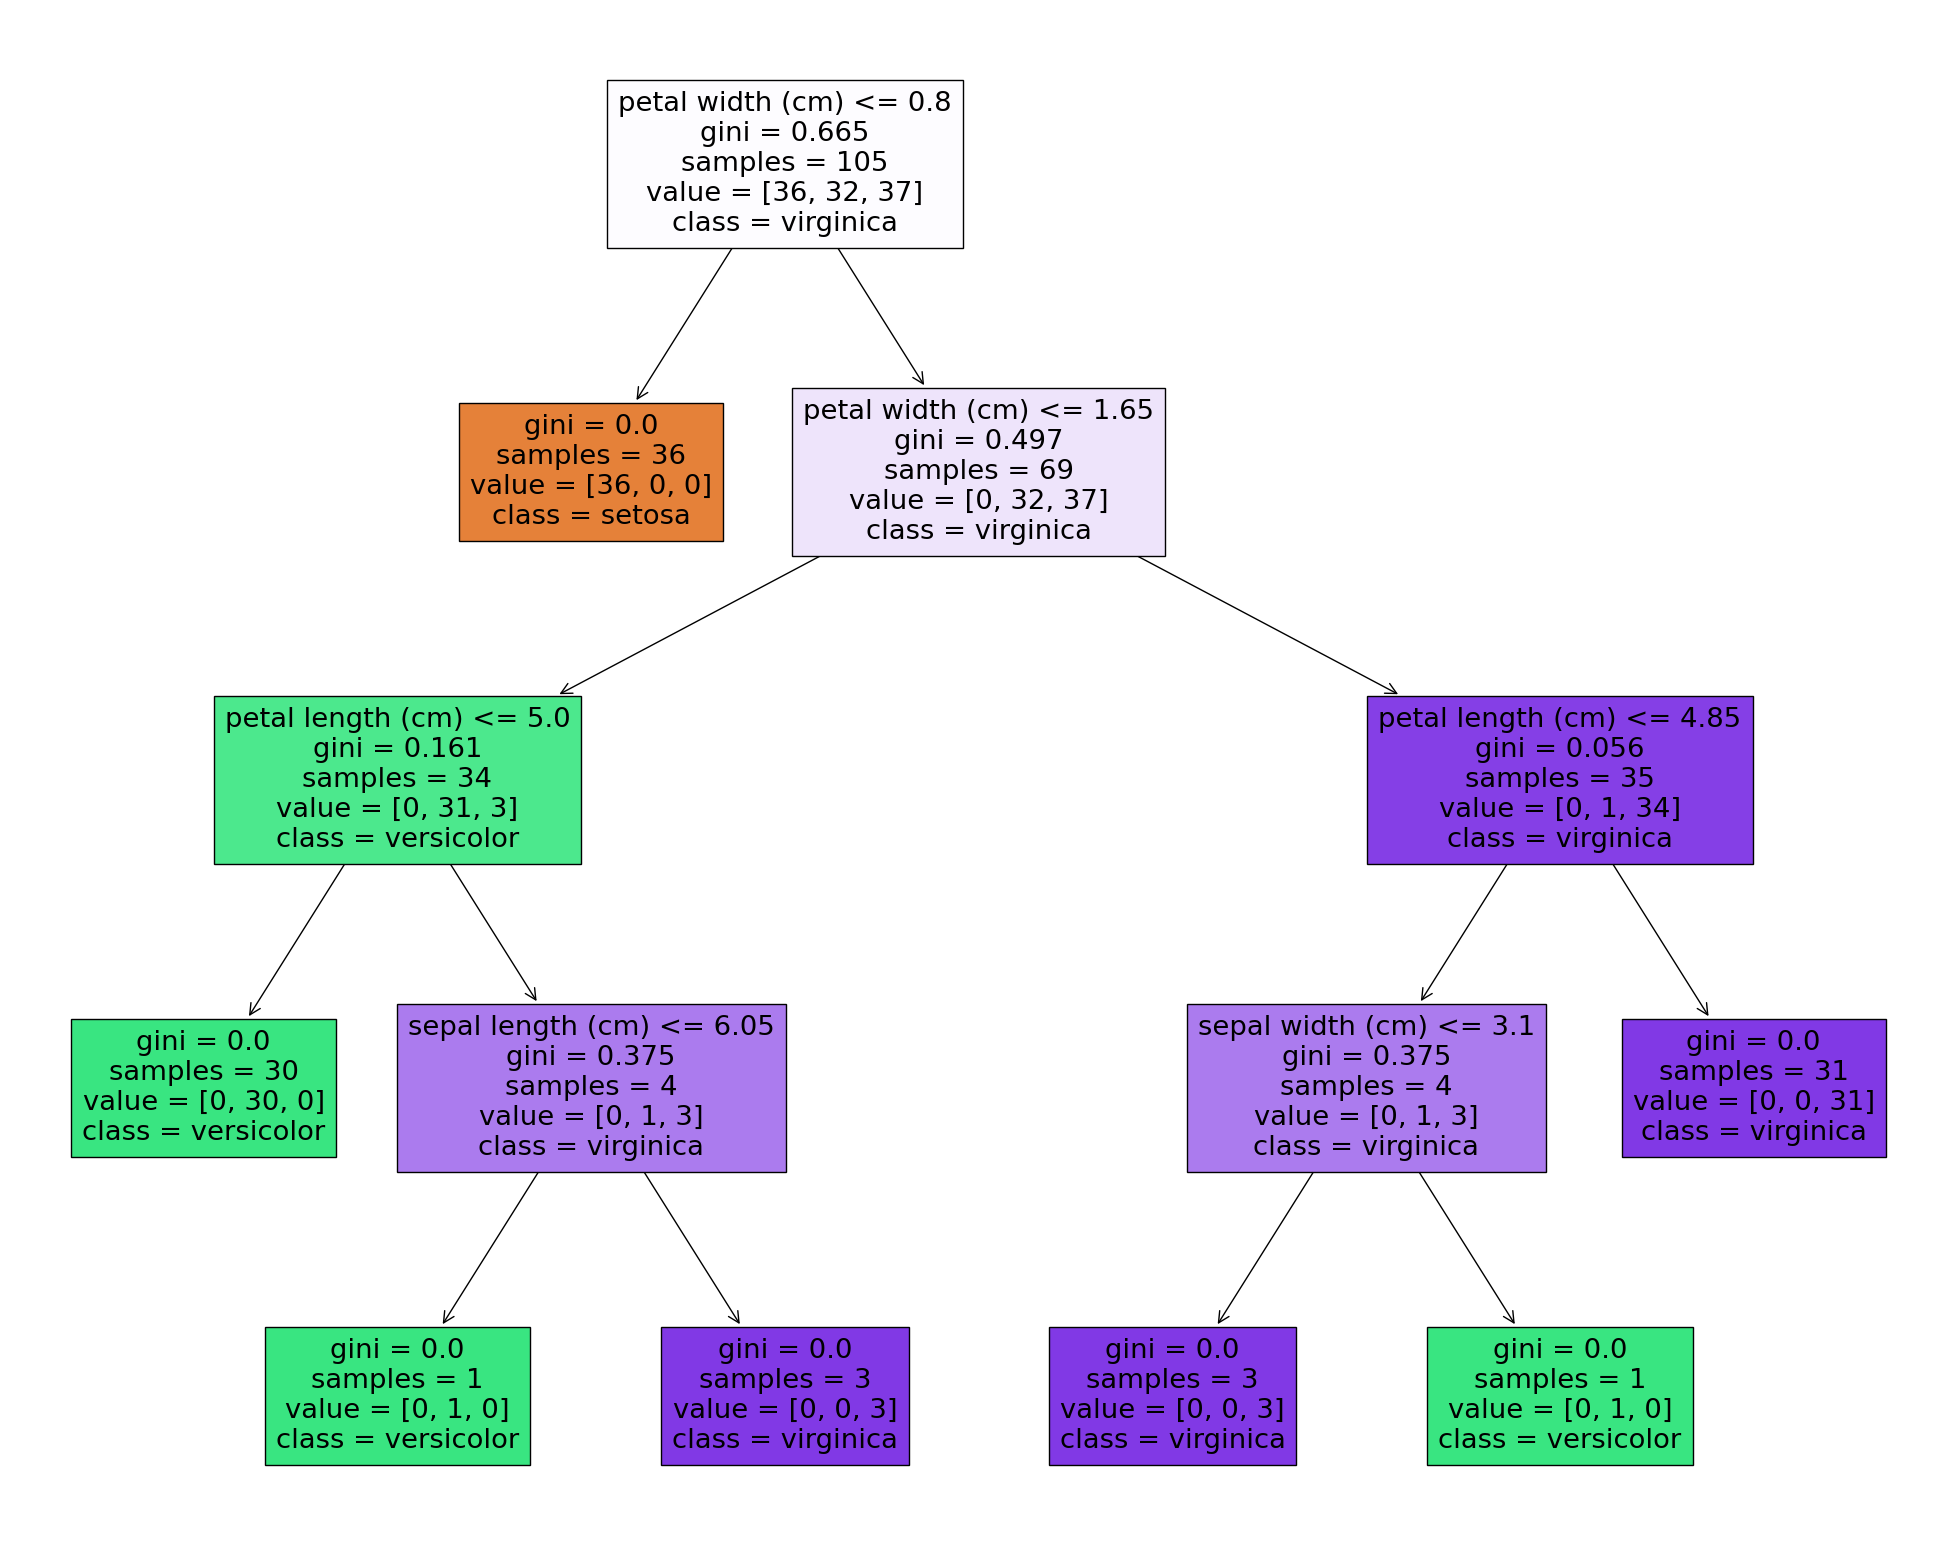

In [16]:
fig = plt.figure(figsize = (25,20))  # Creating decision tree on gini
b = tree.plot_tree(clf_gini, feature_names = iris_data.feature_names, class_names = iris_data.target_names, filled = True)

In [17]:
from sklearn.ensemble import BaggingClassifier  # Using bagging to improve the accuracy
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 5)
tree = tree.fit(x_train, y_train)
bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, random_state = 5)
bag = bag.fit(x_train, y_train)
y_train_pred = bag.predict(x_train)
y_test_pred = bag.predict(x_test)

In [18]:
bag_test = round(accuracy_score(y_test, y_test_pred), 2)*100  # Finding the new accuracy
print(bag_test, "%")

96.0 %
